In [1]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[18, 60], [56, 60], [56, 90], [18, 90]], 'NL', 0.9998047813792929), ([[68, 10], [488, 10], [488, 108], [68, 108]], 'S-489-BF', 0.719894281403136)]


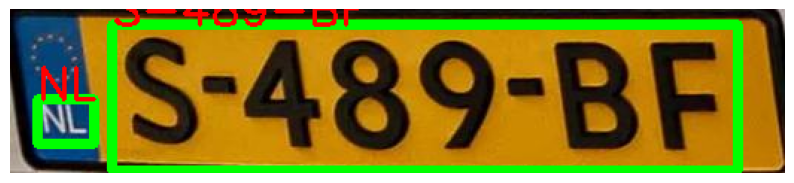

In [16]:
result = reader.readtext('processed_images/cropped.jpg')
print(result)

# draw bounding boxes
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('processed_images/cropped.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for (bbox, text, prob) in result:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    img = cv2.rectangle(img, tuple(top_left), tuple(bottom_right), (0, 255, 0), 5)
    img = cv2.putText(img, text, tuple(top_left), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
result = reader.detect('processed_images/cropped.jpg')[0][0]
print(result)

[[18, 56, 60, 90], [68, 488, 10, 108]]


In [27]:
def find_largest_text_area(bounding_boxes):
    max_width = 0
    box = None
    for box in bounding_boxes:
        width = box[1] - box[0]
        if width > max_width:
            max_width = width
            box = box
    return box

def crop_image(image):
    result = reader.detect(image)[0][0]
    box = find_largest_text_area(result)

    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
    cropped_img = img[box[2]:box[3], box[0]:box[1]]
    cv2.imwrite('processed_images/cropped1.jpg', cv2.cvtColor(cropped_img, cv2.COLOR_RGB2BGR))





crop_image('processed_images/cropped.jpg')
